In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import glob
import numpy as np
import editdistance
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr, spearmanr, kendalltau, rankdata
from MulticoreTSNE import MulticoreTSNE as TSNE
import seaborn as sns
from math import ceil
import gzip
import pandas as pd
import time
import math
from sklearn.metrics.pairwise import pairwise_distances
import gzip
import pickle
import re
from sklearn.cluster import DBSCAN, KMeans
from collections import Counter
from sklearn.metrics import silhouette_score

print(plt.style.available)
plt.style.use('seaborn-whitegrid')

['seaborn-notebook', 'seaborn-bright', 'seaborn-white', 'seaborn-whitegrid', 'ggplot', 'classic', 'seaborn-dark-palette', 'seaborn', 'seaborn-muted', 'seaborn-pastel', 'grayscale', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-ticks', 'bmh', 'fivethirtyeight', '_classic_test', 'seaborn-dark', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-poster', 'seaborn-paper', 'dark_background']


In [2]:
def load_embeds(filename):
    seq_vec = []
    emb_vec = []
    with gzip.open(filename) as inpf:
        for line in inpf:
            words = line.strip().split()
            seq_vec.append(words[0].decode())
            emb_vec.append(list(map(float, words[1:])))
    emb_vec = np.array(emb_vec)
    
    return seq_vec, emb_vec

seq_vec, emb_vec = load_embeds("../results/words_lay2/hid128_euc_walln//embeddings_train.final.txt.gz")

In [3]:
def embed_dist(emb_vec, mat_file, metric):
    old_mat = np.load(mat_file)["matrix"]
    inds_vec = np.load(mat_file)["inds10"]
    
    res = []
    for i in range(old_mat.shape[0]):
        res.append((pairwise_distances(old_mat[i].reshape((1, -1)), old_mat[inds_vec[i]], metric=metric)).mean())
    old_dist = np.array(res)
    
    res = []
    for i in range(old_mat.shape[0]):
        res.append((pairwise_distances(emb_vec[i].reshape((1, -1)), emb_vec[inds_vec[i]], metric=metric)).mean())
    new_dist = np.array(res)

    corS = spearmanr(new_dist, old_dist)
    corP = pearsonr(new_dist, old_dist)
    corK = kendalltau(new_dist, old_dist)
    
    return new_dist, old_dist, corS, corP, corK


tmp = embed_dist(emb_vec, "../words_euc/words_euc_all_norm.npz", "euclidean")

In [5]:
with open("word_dict.pkl", "rb") as in_file:
    word_dict = pickle.load(in_file)

In [307]:
from sklearn.manifold import TSNE as skTSNE

_, emb_vec = load_embeds("../results/words_lay2/hid256_cos_w100s/embeddings_train.final.txt.gz")
dist_mat = pairwise_distances(emb_vec, metric="cosine", n_jobs=-1)

In [7]:
import multiprocessing as mp

glob.glob("../results/words_lay2/*")

file_list = ['../results/words_lay2/hid128_cos_w100l',
 '../results/words_lay2/hid128_cos_w100n',
 '../results/words_lay2/hid128_cos_w100s',
 '../results/words_lay2/hid128_cos_w10l']

for filename in file_list:
    _, emb_vec = load_embeds(filename + "/embeddings_train.final.txt.gz")
    dist_mat = pairwise_distances(emb_vec, metric="cosine", n_jobs=1)
    
    fig, ax = plt.subplots(1, 2)

    fig.set_figwidth(10)

    tmp = ax[0].hist(np.sort(dist_mat)[:, 1], bins=100)
    tmp = ax[1].hist(np.sort(pairwise_distances(tsne_vec1, n_jobs=-1))[:, 1], bins=100)

    ax[0].set_title("Original closest distances")
    ax[1].set_title("t-SNE closest distances")
    
    savefig(filename[filename.rfind["/"] + 1 : ] + '.png')

['../results/words_lay2/hid128_cos_w100l',
 '../results/words_lay2/hid128_cos_w100n',
 '../results/words_lay2/hid128_cos_w100s',
 '../results/words_lay2/hid128_cos_w10l',
 '../results/words_lay2/hid128_cos_w10n',
 '../results/words_lay2/hid128_cos_w10s',
 '../results/words_lay2/hid128_cos_w30l',
 '../results/words_lay2/hid128_cos_w30n',
 '../results/words_lay2/hid128_cos_w30s',
 '../results/words_lay2/hid128_cos_wAlll',
 '../results/words_lay2/hid128_cos_wAlln',
 '../results/words_lay2/hid128_cos_wAlls',
 '../results/words_lay2/hid128_euc_w100l',
 '../results/words_lay2/hid128_euc_w100n',
 '../results/words_lay2/hid128_euc_w100s',
 '../results/words_lay2/hid128_euc_w10l',
 '../results/words_lay2/hid128_euc_w10n',
 '../results/words_lay2/hid128_euc_w10s',
 '../results/words_lay2/hid128_euc_w30l',
 '../results/words_lay2/hid128_euc_w30n',
 '../results/words_lay2/hid128_euc_w30s',
 '../results/words_lay2/hid128_euc_wAlll',
 '../results/words_lay2/hid128_euc_wAlln',
 '../results/words_lay2

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2)

fig.set_figwidth(8)
fig.set_figheight(8)

tsne_vec1 = skTSNE(2, 200, metric="precomputed").fit_transform(dist_mat)
ax[0][0].scatter(tsne_vec1[:,0], tsne_vec1[:,1], alpha=.2, s=12)

tsne_vec2 = skTSNE(2, 400, metric="precomputed").fit_transform(dist_mat)
ax[0][1].scatter(tsne_vec2[:,0], tsne_vec2[:,1], alpha=.2, s=12)

tsne_vec3 = skTSNE(2, 700, metric="precomputed").fit_transform(dist_mat)
ax[1][0].scatter(tsne_vec3[:,0], tsne_vec3[:,1], alpha=.2, s=12)

tsne_vec4 = skTSNE(2, 1200, metric="precomputed").fit_transform(dist_mat)
ax[1][1].scatter(tsne_vec4[:,0], tsne_vec4[:,1], alpha=.2, s=12)

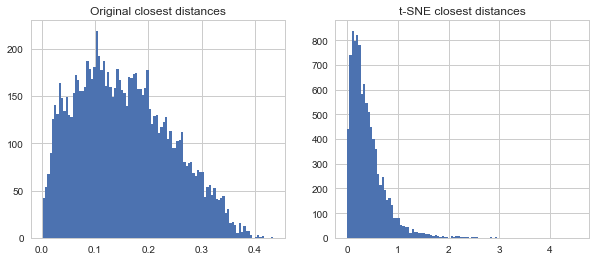

In [311]:
fig, ax = plt.subplots(1, 2)

fig.set_figwidth(10)

tmp = ax[0].hist(np.sort(dist_mat)[:, 1], bins=100)
tmp = ax[1].hist(np.sort(pairwise_distances(tsne_vec1, n_jobs=-1))[:, 1], bins=100)

ax[0].set_title("Original closest distances")
ax[1].set_title("t-SNE closest distances")

In [8]:
# Клышинскому в первый раз кинул вот такие:
# hid256_cos_w100s

vec_data = tsne_vec1

eps1 = .5
eps2 = 0.75
eps3 = 1
eps4 = 1.25

# eps1 = 100
# eps2 = 130
# eps3 = 200
# eps4 = 250

res_cl1 = DBSCAN(eps=eps1, n_jobs=4).fit_predict(vec_data)
res_cl2 = DBSCAN(eps=eps2, n_jobs=4).fit_predict(vec_data)
res_cl3 = DBSCAN(eps=eps3, n_jobs=4).fit_predict(vec_data)
res_cl4 = DBSCAN(eps=eps4, n_jobs=4).fit_predict(vec_data)

# res_cl1 = KMeans(eps1, n_jobs=4).fit_predict(vec_data)
# res_cl2 = KMeans(eps2, n_jobs=4).fit_predict(vec_data)
# res_cl3 = KMeans(eps3, n_jobs=4).fit_predict(vec_data)
# res_cl4 = KMeans(eps4, n_jobs=4).fit_predict(vec_data)

fig, ax = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)

plot_clusters(vec_data, res_cl1, ax[0][0], title=eps1)
plot_clusters(vec_data, res_cl2, ax[0][1], title=eps2)
plot_clusters(vec_data, res_cl3, ax[1][0], title=eps3)
plot_clusters(vec_data, res_cl4, ax[1][1], title=eps4)

NameError: name 'tsne_vec1' is not defined

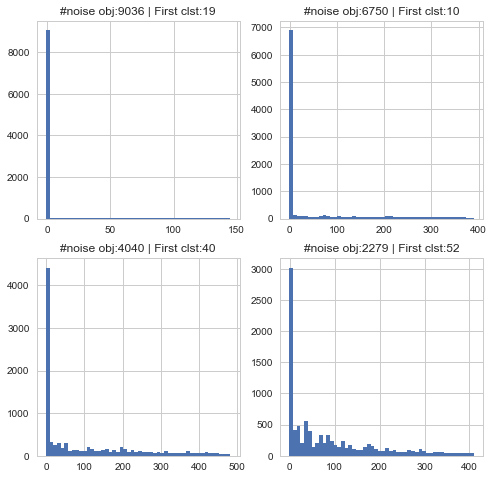

In [340]:
fig, ax = plt.subplots(2, 2)

fig.set_figheight(8)
fig.set_figwidth(8)

def plot_clust_hist(res_cl, ax):
    ax.hist(res_cl, bins=50)
    ax.set_title("#noise obj:" + str((res_cl == -1).sum()) + " | First clst:" + str((res_cl == 0).sum()))

plot_clust_hist(res_cl1, ax[0][0])
plot_clust_hist(res_cl2, ax[0][1])
plot_clust_hist(res_cl3, ax[1][0])
plot_clust_hist(res_cl4, ax[1][1])

/Users/vdn/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


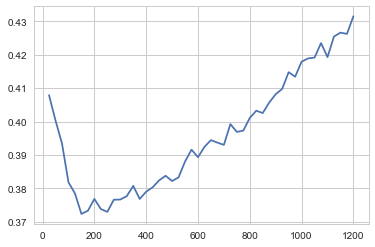

In [334]:
def compute_sill(X, min_clusters, max_clusters):
    arr = []
    step = 25
    for n_clusters in range(min_clusters, max_clusters+1, step):
        clust = KMeans(n_clusters=n_clusters, n_jobs=4)
        pred = clust.fit_predict(X)
        arr.append(silhouette_score(X, pred))
    plt.plot(range(min_clusters, max_clusters+1, step), arr)
    plt.legend()

compute_sill(vec_data, 25, 1200)

/Users/vdn/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


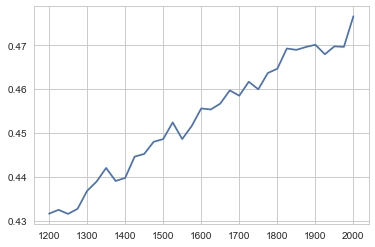

In [335]:
compute_sill(vec_data, 1200, 2000)

In [337]:
sequences = np.load("../words_euc/words_euc_100_sum.npz")["names"]

# sequences = np.array(sequences)
for cluster_res, eps_val in zip([res_cl1, res_cl2, res_cl3, res_cl4], [eps1, eps2, eps3, eps4]):
    with open("clust_dbscan_eps" + str(eps_val).replace(".", "") + ".txt", "w") as outf:
        for clust_ind in set(cluster_res):
            if clust_ind != -1:
                subset = sequences[cluster_res == clust_ind]
    #             if len(subset) < 20:
                for x in sorted(subset):
                    print(x, file=outf)
                print(file=outf)
    #     subset = sequences[cluster_res == -1]
    #     for x in sorted(subset):
    #         print(x, file=outf)
    #     print(file=outf)

In [210]:
def plot_corr_plots(name, dist_tuple, ax1, ax2):
    new_dist, old_dist, _, _, _ = dist_tuple
    
#     corS = spearmanr(new_dist, old_dist)
    corP = pearsonr(new_dist, old_dist)
    corK = kendalltau(new_dist, old_dist)
    
    ax1.set_title(name)
    ax2.set_title("".join(map(lambda x: str(x), ["P=", round(corP[0], 2), "; K=", round(corK[0], 2)])))
    ax1.scatter(old_dist, new_dist, s=2)
    ax2.scatter(rankdata(old_dist), rankdata(new_dist), s=2)

In [289]:
def plot_clusters(res, labels, ax, legend=False, psize=4, alpha=1, title=None):
    labels = np.array(labels)

    for uniq_len in set(labels):
        ax.scatter(res[labels==uniq_len,0], res[labels==uniq_len,1], label=uniq_len, s=psize, alpha=alpha)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1, Paired  
    colorst = [colormap(i) for i in np.linspace(0, 0.9, len(ax.collections))]

    for t, j1 in enumerate(ax.collections):
        j1.set_color(colorst[t])

    if legend:
        ax.legend()
        
    if title:
        ax.set_title(title)

In [14]:
dist_dict = {}
with open("dist_dict.pkl", "rb") as in_file:
    dist_dict = pickle.load(in_file)
print(sorted(dist_dict.keys()))

['cos100log', 'cos100norm', 'cos100sum', 'cos10log', 'cos10norm', 'cos10sum', 'cos30log', 'cos30norm', 'cos30sum', 'cosalllog', 'cosallnorm', 'cosallsum', 'euc100log', 'euc100norm', 'euc100sum', 'euc10log', 'euc10norm', 'euc10sum', 'euc30log', 'euc30norm', 'euc30sum', 'eucalllog', 'eucallnorm', 'eucallsum']


In [28]:
for key in dist_dict:
    for subkey, val in dist_dict[key].items():
        print(key, subkey, round(val[2][0], 2), round(val[3][0], 2), round(val[4][0], 2), sep="\t")

euc100log	lle	0.27	0.18	0.19
euc100log	mds	0.4	0.92	0.28
cos10log	lle	0.65	0.61	0.46
cos10log	mds	0.64	0.67	0.46
cos30norm	lle	0.7	0.67	0.51
cos30norm	mds	0.54	0.57	0.38
cosalllog	lle	0.46	0.46	0.32
cosalllog	mds	0.75	0.75	0.56
cos30log	lle	0.63	0.6	0.45
cos30log	mds	0.69	0.71	0.5
cos10norm	lle	0.7	0.67	0.51
cos10norm	mds	0.52	0.54	0.36
euc30norm	lle	0.4	0.34	0.27
euc30norm	mds	0.42	0.47	0.29
cos100sum	lle	0.62	0.58	0.45
cos100sum	mds	0.55	0.58	0.39
euc100sum	lle	0.12	0.19	0.08
euc100sum	mds	0.71	0.75	0.52
cos30sum	lle	0.68	0.65	0.49
cos30sum	mds	0.52	0.56	0.37
eucallsum	lle	0.15	0.22	0.1
eucallsum	mds	0.83	0.83	0.65
cosallsum	lle	0.64	0.6	0.46
cosallsum	mds	0.55	0.58	0.39
cos100log	lle	0.63	0.6	0.45
cos100log	mds	0.66	0.69	0.48
cos100norm	lle	0.7	0.69	0.51
cos100norm	mds	0.55	0.58	0.39
euc30sum	lle	0.07	0.11	0.05
euc30sum	mds	0.55	0.61	0.4
cos10sum	lle	0.73	0.7	0.54
cos10sum	mds	0.53	0.55	0.37
euc100norm	lle	0.36	0.3	0.24
euc100norm	mds	0.44	0.49	0.31
euc10sum	lle	0.18	0.12	0.12
euc10

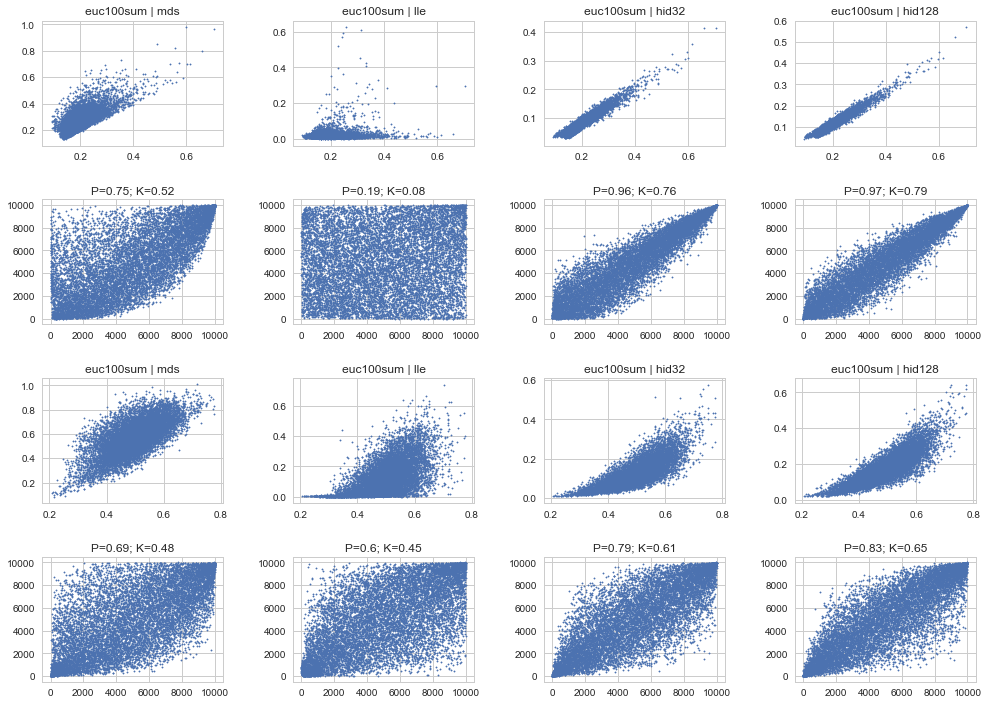

In [193]:
fig, ax = plt.subplots(ncols=4, nrows=4)
fig.tight_layout(pad=.2)
fig.set_figwidth(14)
fig.set_figheight(10)

key1 = "euc100sum"
key2 = "cos100log"

plot_corr_plots(key1 + " | mds", dist_dict[key1]["mds"], ax[0][0], ax[1][0])
plot_corr_plots(key1 + " | lle", dist_dict[key1]["lle"], ax[0][1], ax[1][1])
plot_corr_plots(key1 + " | hid32", word_dict[key1]["hid32"], ax[0][2], ax[1][2])
plot_corr_plots(key1 + " | hid128", word_dict[key1]["hid128"], ax[0][3], ax[1][3])

plot_corr_plots(key1 + " | mds", dist_dict[key2]["mds"], ax[2][0], ax[3][0])
plot_corr_plots(key1 + " | lle", dist_dict[key2]["lle"], ax[2][1], ax[3][1])
plot_corr_plots(key1 + " | hid32", word_dict[key2]["hid32"], ax[2][2], ax[3][2])
plot_corr_plots(key1 + " | hid128", word_dict[key2]["hid128"], ax[2][3], ax[3][3])

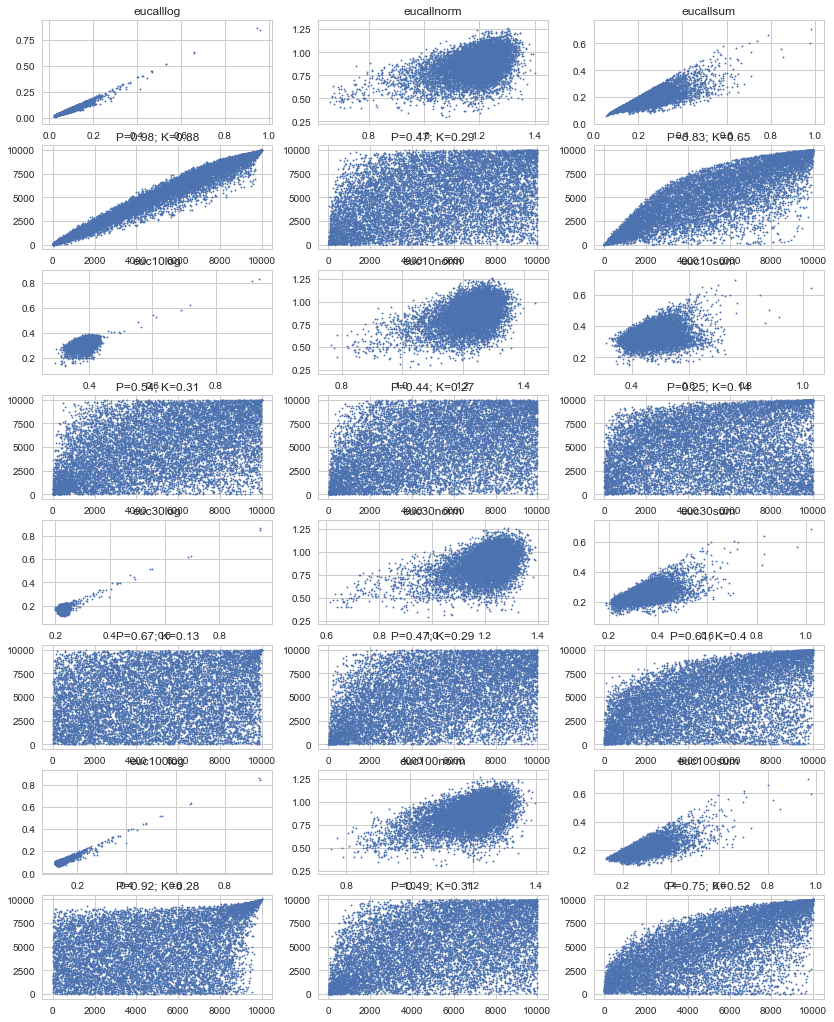

In [39]:
key_list = ["eucalllog", "eucallnorm", "eucallsum"]

fig, ax = plt.subplots(ncols=len(key_list), nrows=8)

for i, key in enumerate(key_list):
    plot_corr_plots(key, dist_dict[key]["mds"], ax[0][i], ax[1][i])
    

key_list = ["euc10log", "euc10norm", "euc10sum"]
for i, key in enumerate(key_list):
    plot_corr_plots(key, dist_dict[key]["mds"], ax[2][i], ax[3][i])
    
    
key_list = ["euc30log", "euc30norm", "euc30sum"]
for i, key in enumerate(key_list):
    plot_corr_plots(key, dist_dict[key]["mds"], ax[4][i], ax[5][i])
    
    
key_list = ["euc100log", "euc100norm", "euc100sum"]
for i, key in enumerate(key_list):
    plot_corr_plots(key, dist_dict[key]["mds"], ax[6][i], ax[7][i])
    

fig.set_figwidth(14)
fig.set_figheight(18)